### The capital asset pricing model describes the relationship between systematic risk and expected return for a given asset. 
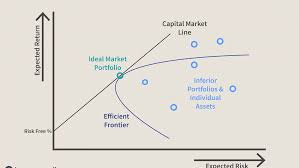
#### Source: https://www.investopedia.com/terms/c/capm.asp

### Beta is the measurement of volatility of a given stock compared to the entire market. Riskier assets such as Tesla or up-and-coming tech stocks will typically have a higher beta but also typically come with a higher expected return.

### The CAPM formula is shown below and was found at https://www.mint2save.com/capm-capital-asset-pricing-model-explained/
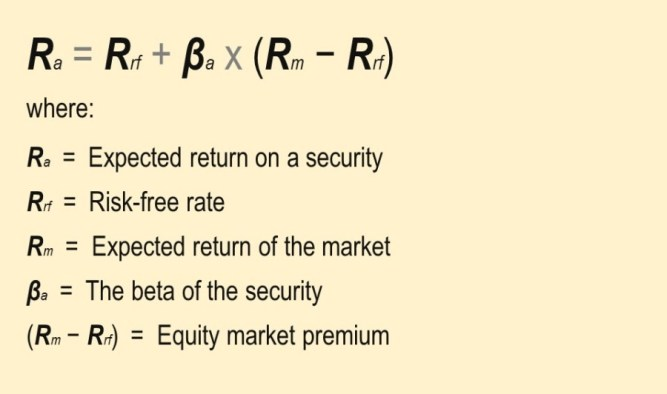

In [2]:
#Importing the yahoo finance library to import historical stock data
#Importing popular data analysis and visualization libraries
import yfinance as yf
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Using yfinance to read in 5 years of daily closing prices for 5 stocks and the S&P500
tickersList = ['AMZN', 'SAM', 'TSLA', 'ETSY', 'TDOC', 'SPY']
stockDF = pdr.get_data_yahoo(tickersList, start = '2016-01-15', end = '2021-01-16')['Adj Close']
stockDF.reset_index(inplace = True)

#It should already be in ascending order by date but using sort_values to confirm.
stockDF = stockDF.sort_values(by = ['Date'])
stockDF

Symbols,Date,AMZN,SAM,TSLA,ETSY,TDOC,SPY
0,2016-01-15,570.179993,164.000000,40.998001,7.000000,17.020000,170.519791
1,2016-01-19,574.479980,166.160004,40.944000,6.650000,16.629999,170.746765
2,2016-01-20,571.770020,163.720001,39.740002,6.880000,15.740000,168.558640
3,2016-01-21,575.020020,163.949997,39.993999,6.990000,16.340000,169.502914
4,2016-01-22,596.380005,164.619995,40.509998,7.420000,17.440001,172.980286
...,...,...,...,...,...,...,...
1255,2021-01-11,3114.209961,933.789978,811.190002,183.039993,220.860001,378.690002
1256,2021-01-12,3120.830078,918.650024,849.440002,205.149994,230.089996,378.769989
1257,2021-01-13,3165.889893,923.429993,854.409973,207.029999,231.789993,379.790009
1258,2021-01-14,3127.469971,910.710022,845.000000,211.520004,225.539993,378.459991


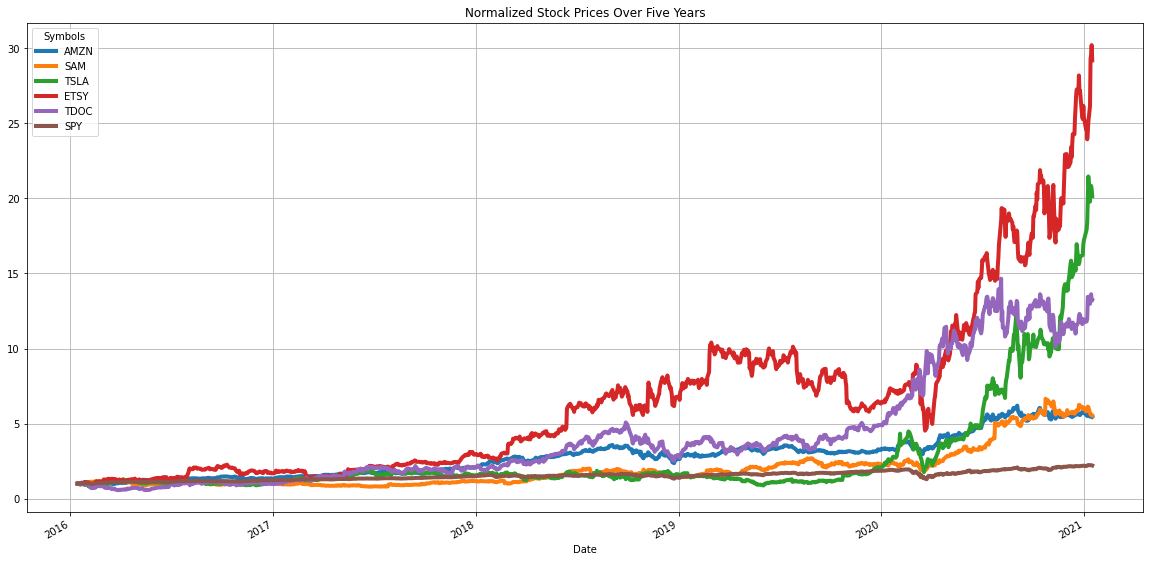

In [3]:
#To make them all start at the same starting point, divide each price by the initial price to show proper returns
normalizedStockDF = stockDF.copy() #Making a copy so swe can still have the old data frame

for i in normalizedStockDF.columns[1:]: #All columns except the date
    normalizedStockDF[i] = normalizedStockDF[i] / normalizedStockDF[i][0]

#Using pyplot to look at normalized stock price change over time
normalizedStockDF.plot(x = 'Date', figsize = (20, 10), linewidth = 4, 
             title = 'Normalized Stock Prices Over Five Years')
plt.grid()

In [4]:
#Creating a function to examine daily changes in stock price
def dailyMovement(stockData):
    dailyMovementDF = stockData.copy() #Making a copy so we don't overwrite our other set
    
    #Looping through each column except the date column
    for i in stockData.columns[1:]:
        
        #Looping through each row
        for j in range(1, len(stockData)): #All rows except the title row
            
            #Calculating percentage change by subtracting the current day from the previous day change
            dailyMovementDF[i][j] = ((stockData[i][j] - stockData[i][j-1]) / stockData[i][j-1]) * 100
            
        #Setting the first row's previous value to 0 since it's non-existent
        dailyMovementDF[i][0] = 0
        
    return dailyMovementDF

#Calling the function
dailyPriceChange = dailyMovement(stockDF)
dailyPriceChange

<ipython-input-4-f5086fd8a162>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dailyMovementDF[i][j] = ((stockData[i][j] - stockData[i][j-1]) / stockData[i][j-1]) * 100
<ipython-input-4-f5086fd8a162>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dailyMovementDF[i][0] = 0


Symbols,Date,AMZN,SAM,TSLA,ETSY,TDOC,SPY
0,2016-01-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2016-01-19,0.754146,1.317075,-0.131716,-4.999999,-2.291429,0.133107
2,2016-01-20,-0.471724,-1.468466,-2.940598,3.458647,-5.351771,-1.281503
3,2016-01-21,0.568410,0.140481,0.639149,1.598832,3.811947,0.560206
4,2016-01-22,3.714651,0.408660,1.290191,6.151650,6.731948,2.051511
...,...,...,...,...,...,...,...
1255,2021-01-11,-2.151946,-6.666735,-7.821415,4.207230,-3.038018,-0.674083
1256,2021-01-12,0.212578,-1.621345,4.715295,12.079328,4.179116,0.021122
1257,2021-01-13,1.443841,0.520325,0.585088,0.916405,0.738840,0.269298
1258,2021-01-14,-1.213558,-1.377470,-1.101342,2.168770,-2.696406,-0.350198


In [5]:
#The next step is to compare one stock (let's say Tesla) to the S&P 500 (SPY)
dailyPriceChange['TSLA']

0       0.000000
1      -0.131716
2      -2.940598
3       0.639149
4       1.290191
          ...   
1255   -7.821415
1256    4.715295
1257    0.585088
1258   -1.101342
1259   -2.229589
Name: TSLA, Length: 1260, dtype: float64

<AxesSubplot:xlabel='TSLA', ylabel='SPY'>

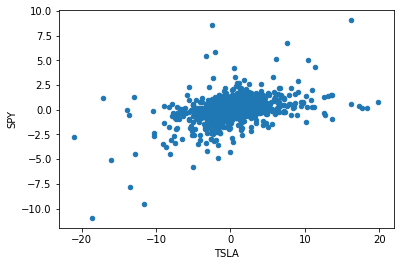

In [6]:
dailyPriceChange['SPY']

#Plotting a scatter plot between Tesla and SPY
dailyPriceChange.plot(kind = 'scatter', x = 'TSLA', y = 'SPY')

In [7]:
#Calculating the beta and alpha of Tesla compared to the SPY
beta, alpha = np.polyfit(dailyPriceChange['SPY'], dailyPriceChange['TSLA'], 1)
print("The beta for Tesla: " + str(beta))
print("The alpha for Tesla: " + str(alpha)) 

#Beta represents Tesla's volatility compared to the overall market and alpha represents Tesla's returns compared to
#the market.

The beta for Tesla: 1.2983018886675237
The alpha for Tesla: 0.21474193707273284


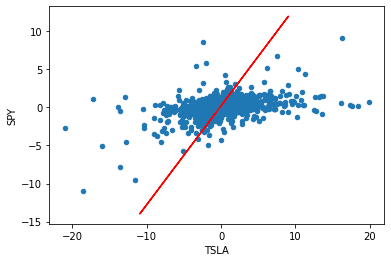

In [8]:
#Plotting the scatterplot along with the polynomial line
dailyPriceChange.plot(kind = 'scatter', x = 'TSLA', y = 'SPY')
plt.plot(dailyPriceChange['SPY'], beta * dailyPriceChange['SPY'] + alpha, '-', color = 'r')

In [9]:
#Now that we have beta and alpha, we can calculate the CAPM for an individual stock

#First, we'll calculate the annualized rate of return for S&P 500
annualSPReturn = dailyPriceChange['SPY'].mean() * 252 #There are 252 trading days a year
annualSPReturn

#You can confirm the answer by looking at a chart online for the time range in the dataframe

17.57320062138784

In [11]:
#Next, we'll define what is called the "risk-free" rate. This is the rate you could get with virtually no risk by 
#investing in 10-year U.S. treasury bonds. The current rate as I'm typing this is about 1.34% or .0134
riskFreeRate = 0.0134

#Now we can compute the CAPM formula which is the risk free rate + beta * (annual S&P return - risk free rate)
teslaExpectedReturn = riskFreeRate + (beta * (annualSPReturn - riskFreeRate))
teslaExpectedReturn

#The number you see is the expected return when you consider risk and volatility

22.81132231137299

In [21]:
#We can now use the CAPM for all stocks in our portfolio but first we need to get the beta and alpha for all of them

#Creating placeholders for our beta and alpha
beta = {}
alpha = {}

#Looping through all columns except the date and SPY
for i in dailyPriceChange[['AMZN', 'SAM', 'TSLA', 'ETSY', 'TDOC']]:
    b, a = np.polyfit(dailyPriceChange['SPY'], dailyPriceChange[i], 1)
    #Adding the beta and alpha to our dictionaries
    beta[i] = b
    alpha[i] = a

#Showing the beta and alpha of each stock
print(beta)
print(alpha)

{'AMZN': 0.9479161512182026, 'SAM': 0.7485364342183602, 'TSLA': 1.2983018886675237, 'ETSY': 1.2568225164307614, 'TDOC': 0.7769687862168166}
{'AMZN': 0.08638956928999787, 'SAM': 0.1159519215685325, 'TSLA': 0.21474193707273284, 'ETSY': 0.24089537511439016, 'TDOC': 0.21533959665162314}


In [23]:
#Now that we have alpha and beta for each stock, we can apply CAPM to all stocks and the entire portfolio
stocks = list(beta.keys())
expectedReturns = {}
for i in stocks:
    expectedReturns[i] = riskFreeRate + (beta[i] * (annualSPReturn - riskFreeRate))

#Printing out the expected returns using CAPM on every stock
for i in stocks:
    print("The expected return for " + i + " is " + str(expectedReturns[i]) + "%")

The expected return for AMZN is 16.658618621184964%
The expected return for SAM is 13.157550542719001%
The expected return for TSLA is 22.81132231137299%
The expected return for ETSY is 22.082952804995113%
The expected return for TDOC is 13.656816975009013%


In [25]:
#Now, let's assume we have an equally weighted portfolio and we want to see the expected return for the whole
#portfolio.
portfolioWeights = 1/5 * np.ones(5)
portfolioReturns = sum(list(expectedReturns.values()) * portfolioWeights)
print("The expected return for an equally weighted portfolio is: " + str(portfolioReturns) + "%")

The expected return for an equally weighted portfolio is: 17.673452251056215%
